**Segment anything - deleting from an image**

In [21]:
!pip install simple-lama-inpainting segment-anything
%load_ext autoreload
%autoreload 2
!pip install scipy
!pip install matplotlib
%reload_ext autoreload
!pip install segment-anything

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# !wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

--2024-05-05 09:14:00--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 2600:9000:2579:a600:13:6e38:acc0:93a1, 2600:9000:2579:3000:13:6e38:acc0:93a1, 2600:9000:2579:6400:13:6e38:acc0:93a1, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|2600:9000:2579:a600:13:6e38:acc0:93a1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘sam_vit_h_4b8939.pth.1’

sam_vit_h_4b8939.pt   1%[                    ]  32.48M  10.7MB/s    eta 3m 45s ^C


In [22]:
from os import path
import math
from PIL import Image

from simple_lama_inpainting import SimpleLama

import scipy
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

# modify to where you store your project data including utils
datadir = "CS445_Group_Project/Project_Files"

# can change this to your output directory of choice
!mkdir "images"
!mkdir "images/outputs"

mkdir: images: File exists
mkdir: images/outputs: File exists


In [23]:
from segment_anything import sam_model_registry

# Path to the model checkpoint
sam_checkpoint = "/Users/prasadgole/Desktop/Illinois/Computational Photography/Group Project/CS445_Group_Project/sam_vit_h_4b8939.pth"
model_type = "vit_h"

# Check if CUDA is available, otherwise use CPU
# device = "cuda" if torch.cuda.is_available() else "cpu"
device = "cpu"

# Load the model
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

print("Loaded on", device)


Loaded on cpu


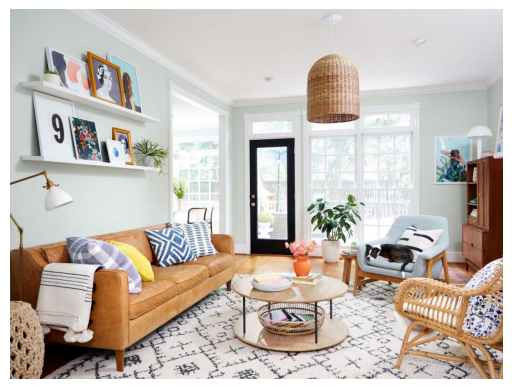

In [24]:
image_path = '/Users/prasadgole/Desktop/Illinois/Computational Photography/Group Project/CS445_Group_Project/Project_Files/room.jpeg'
#image_path = "/content/final/room.jpeg"

image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')  # Hide axes ticks if you want
plt.show()

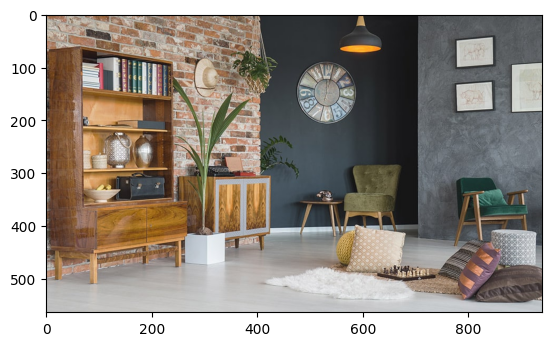

In [25]:
couch_path = '/Users/prasadgole/Desktop/Illinois/Computational Photography/Group Project/CS445_Group_Project/Project_Files/room4.jpg'
#image_path = "/content/final/room.jpeg"

couch = Image.open(couch_path)

plt.imshow(couch)
# plt.axis('off')  # Hide axes ticks if you want
plt.show()

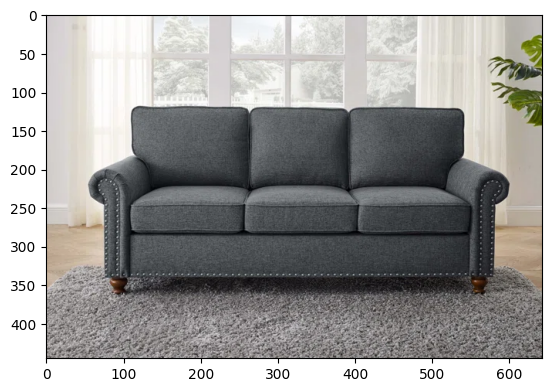

In [26]:
couch10_path = '/Users/prasadgole/Desktop/Illinois/Computational Photography/Group Project/CS445_Group_Project/Project_Files/better_sofa.jpg'

couch10 = Image.open(couch10_path)

plt.imshow(couch10)
# plt.axis('off')  # Hide axes ticks if you want
plt.show()

In [27]:
width, height = image.size

In [28]:
widthc, heightc = couch.size

In [29]:
width_c10, height_c10 = couch10.size

In [32]:
x, y = 520, 130

normalized_point = np.array([[x / width, y / height]])

point_grids = [normalized_point]

from segment_anything import SamAutomaticMaskGenerator

mask_generator = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=None,
    point_grids=point_grids,
    pred_iou_thresh=0.5,  # Lowered from 0.88
    stability_score_thresh=0.8
)

In [33]:
xc, yc = 535, 140

normalized_point_couch = np.array([[xc / widthc, yc / heightc]])

point_grids_couch = [normalized_point_couch]

mask_generator_couch = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=None,
    point_grids=point_grids_couch,
    pred_iou_thresh=0.5,  # Lowered from 0.88
    stability_score_thresh=0.8
)

In [34]:
xt, yt = 300, 445

normalized_point_table = np.array([[xt / widthc, yt / heightc]])

point_grids_table = [normalized_point_table]

mask_generator_table = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=None,
    point_grids=point_grids_table,
    pred_iou_thresh=0.5,  # Lowered from 0.88
    stability_score_thresh=0.8
)

In [35]:
x10, y10 = 250, 250

normalized_point_c10 = np.array([[x10 / width_c10, y10 / height_c10]])

point_grids_c10 = [normalized_point_c10]

mask_generator_c10 = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=None,
    point_grids=point_grids_c10,
    pred_iou_thresh=0.5,  # Lowered from 0.88
    stability_score_thresh=0.8
)

In [36]:
image_array = np.array(image)

masks = mask_generator.generate(image_array)

In [37]:

couch_array = np.array(couch)

maskscouch = mask_generator_couch.generate(couch_array)

In [38]:
couch_array = np.array(couch)

maskstable = mask_generator_table.generate(couch_array)

In [39]:
couch10_array = np.array(couch10)

masks_couch10 = mask_generator_c10.generate(couch10_array)

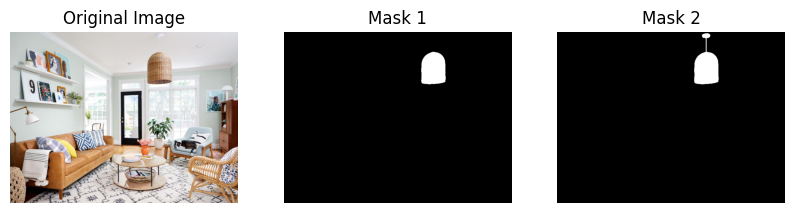

In [40]:
plt.figure(figsize=(10, 5))
plt.subplot(1, len(masks) + 1, 1)
plt.imshow(np.array(image))
plt.title('Original Image')
plt.axis('off')

for i, mask_info in enumerate(masks):
    mask = mask_info['segmentation']
    if isinstance(mask, dict):
        mask = mask_utils.decode(mask)
    plt.subplot(1, len(masks) + 1, i + 2)
    plt.imshow(np.array(mask), cmap='gray')
    plt.title(f'Mask {i+1}')
    plt.axis('off')

plt.show()

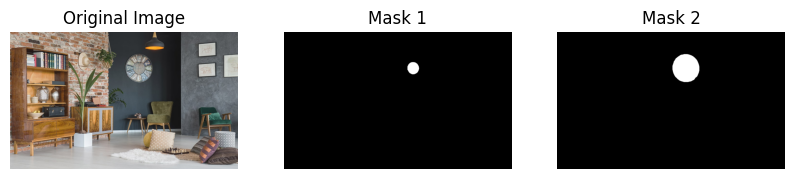

In [41]:
plt.figure(figsize=(10, 5))
plt.subplot(1, len(maskscouch) + 1, 1)
plt.imshow(np.array(couch))
plt.title('Original Image')
plt.axis('off')

for i, mask_info in enumerate(maskscouch):
    mask = mask_info['segmentation']
    if isinstance(mask, dict):
        mask = mask_utils.decode(mask)
    plt.subplot(1, len(maskscouch) + 1, i + 2)
    plt.imshow(np.array(mask), cmap='gray')
    plt.title(f'Mask {i+1}')
    plt.axis('off')

plt.show()

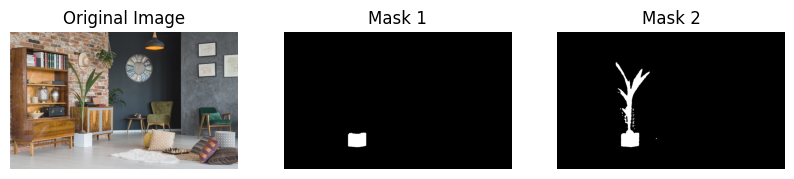

In [42]:
plt.figure(figsize=(10, 5))
plt.subplot(1, len(maskstable) + 1, 1)
plt.imshow(np.array(couch))
plt.title('Original Image')
plt.axis('off')

for i, mask_info in enumerate(maskstable):
    mask = mask_info['segmentation']
    if isinstance(mask, dict):
        mask = mask_utils.decode(mask)
    plt.subplot(1, len(maskstable) + 1, i + 2)
    plt.imshow(np.array(mask), cmap='gray')
    plt.title(f'Mask {i+1}')
    plt.axis('off')

plt.show()

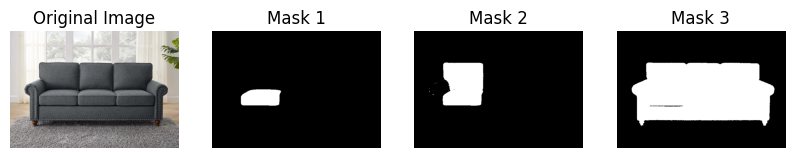

In [43]:
plt.figure(figsize=(10, 5))
plt.subplot(1, len(masks_couch10) + 1, 1)
plt.imshow(np.array(couch10))
plt.title('Original Image')
plt.axis('off')

for i, mask_info in enumerate(masks_couch10):
    mask = mask_info['segmentation']
    if isinstance(mask, dict):
        mask = mask_utils.decode(mask)
    plt.subplot(1, len(masks_couch10) + 1, i + 2)
    plt.imshow(np.array(mask), cmap='gray')
    plt.title(f'Mask {i+1}')
    plt.axis('off')

plt.show()

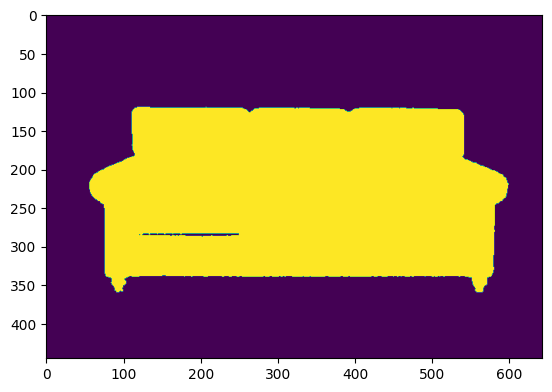

{'segmentation': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), 'area': 106263, 'bbox': [56, 120, 543, 239], 'predicted_iou': 0.8226410150527954, 'point_coords': [[250.0, 250.00000000000003]], 'stability_score': 0.9663165807723999, 'crop_box': [0, 0, 643, 445]}


In [44]:
plt.imshow(masks_couch10[2]['segmentation'])
plt.show()
print(masks_couch10[2])

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


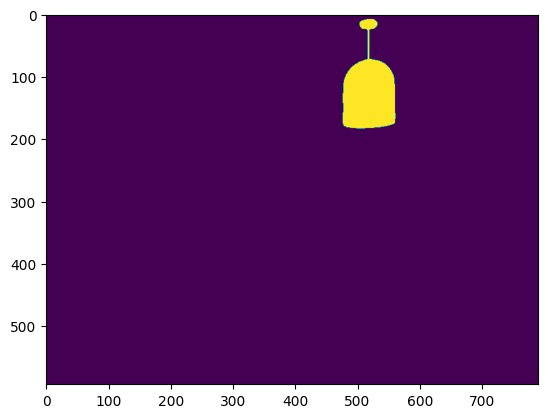

In [59]:
image = image
mask = masks[1]['segmentation']
print(mask)
plt.imshow(mask)


In [50]:
couchmask = maskscouch[0]['segmentation']

In [51]:
def expand_mask(mask, expand_size):
    height, width = mask.shape
    expanded_mask = np.zeros_like(mask)

    for y in range(height):
        for x in range(width):
            if mask[y, x] == 1:  # Check if the current pixel is part of the mask
                top = max(0, y - expand_size)
                bottom = min(height, y + expand_size + 1)
                left = max(0, x - expand_size)
                right = min(width, x + expand_size + 1)
                expanded_mask[top:bottom, left:right] = 1

    return expanded_mask


expand_size = 10
expanded_mask = expand_mask(mask, expand_size)

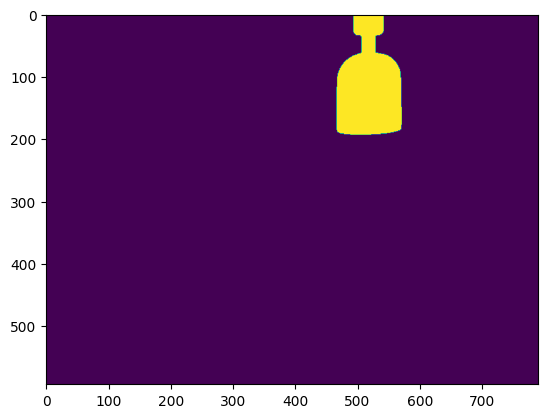

In [52]:
plt.imshow(expanded_mask)
plt.show()

In [53]:
simple_lama = SimpleLama()

image_array = np.array(image)

if image_array.dtype != np.uint8:
    image_array = (image_array * 255).astype(np.uint8)

expanded_mask_array = np.array(expanded_mask)
if expanded_mask_array.dtype != np.uint8:
    expanded_mask_array = (expanded_mask_array * 255).astype(np.uint8)

result = simple_lama(image_array, expanded_mask_array)

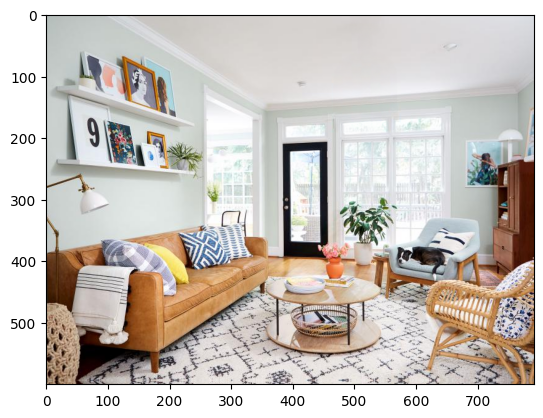

In [54]:
plt.imshow(result)
plt.show()

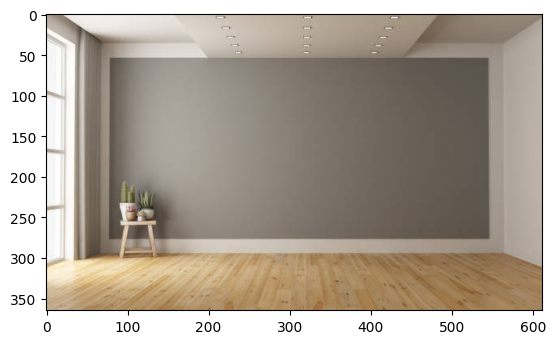

In [70]:
image_path = '/Users/prasadgole/Desktop/Illinois/Computational Photography/Group Project/CS445_Group_Project/Project_Files/room2.jpg'

image2 = Image.open(image_path)

plt.imshow(image2)
# plt.axis('off')
plt.show()

## Texture Transfer using cropped mask

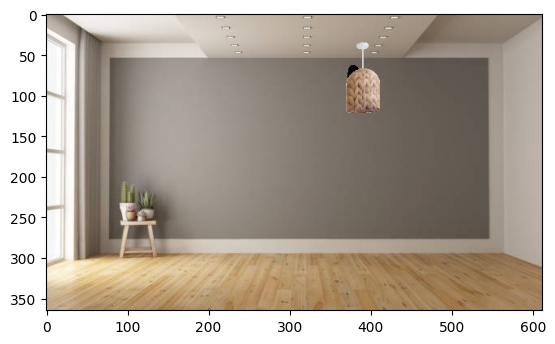

In [71]:
import cv2
import numpy as np
# from google.colab.patches import cv2_imshow  # Import cv2_imshow to replace cv2.imshow

image1 = cv2.imread('/Users/prasadgole/Desktop/Illinois/Computational Photography/Group Project/CS445_Group_Project/Project_Files/room.jpeg')
image2 = cv2.imread('/Users/prasadgole/Desktop/Illinois/Computational Photography/Group Project/CS445_Group_Project/Project_Files/room2.jpg')

mask = masks[1]['segmentation']
bbox = masks[1]['bbox']

cropped_mask = mask[bbox[1]:bbox[1]+bbox[3], bbox[0]:bbox[0]+bbox[2]]
cropped_mask = (cropped_mask > 0).astype('uint8') * 255

cropped_image1 = image1[bbox[1]:bbox[1]+bbox[3], bbox[0]:bbox[0]+bbox[2]]
scale_factor = 0.5

resized_cropped_image1 = cv2.resize(cropped_image1, (int(cropped_image1.shape[1] * scale_factor), int(cropped_image1.shape[0] * scale_factor)))
resized_cropped_mask = cv2.resize(cropped_mask, (int(cropped_mask.shape[1] * scale_factor), int(cropped_mask.shape[0] * scale_factor)))

masked_source = cv2.bitwise_and(resized_cropped_image1, resized_cropped_image1, mask=resized_cropped_mask)
start_x, start_y = 370, 35
end_y = start_y + masked_source.shape[0]
end_x = start_x + masked_source.shape[1]

texture_transfer = True

if not texture_transfer:
    mask = np.any(masked_source != [0, 0, 0], axis=-1)
    image2[start_y:end_y, start_x:end_x][mask] = masked_source[mask]
else:
    texture_image = cv2.imread('/Users/prasadgole/Desktop/Illinois/Computational Photography/Group Project/CS445_Group_Project/Project_Files/texture.png')
    texture_image = cv2.resize(texture_image, (masked_source.shape[1], masked_source.shape[0]))
    textured_object = cv2.seamlessClone(texture_image, masked_source, resized_cropped_mask, (masked_source.shape[1]//2, masked_source.shape[0]//2), cv2.NORMAL_CLONE)
    mask = np.any(textured_object != [0, 0, 0], axis=-1)
    image2[start_y:end_y, start_x:end_x][mask] = textured_object[mask]

output_filename = '/Users/prasadgole/Desktop/Illinois/Computational Photography/Group Project/CS445_Group_Project/images/outputs/texture_transfer_lamp.jpg'
cv2.imwrite(output_filename, image2)
output_image = Image.open("/Users/prasadgole/Desktop/Illinois/Computational Photography/Group Project/CS445_Group_Project/Project_Files/room4.jpg")

plt.imshow(output_image)
plt.show()

## Texture Transfer using Poisson Blending

Solution range: -966734500.0 -810045600.0


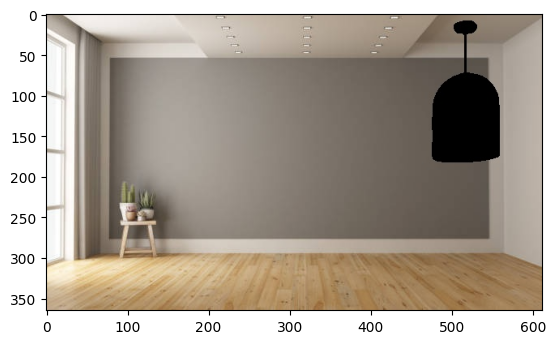

In [86]:
import cv2
import numpy as np
from scipy.sparse import lil_matrix, csr_matrix
from scipy.sparse.linalg import spsolve

def poisson_blend(img_target, img_source, img_mask, offset):
    off_y, off_x = offset
    y_indices, x_indices = np.nonzero(img_mask)
    num_pixels = len(y_indices)
    A = lil_matrix((num_pixels, num_pixels), dtype=np.float32)
    b = np.zeros((num_pixels, 3), dtype=np.float32)

    index_mapping = {idx: i for i, idx in enumerate(zip(y_indices, x_indices))}
    
    for i, (y, x) in enumerate(zip(y_indices, x_indices)):
        connections = 0
        neighbors = [(y, x - 1), (y, x + 1), (y - 1, x), (y + 1, x)]
        for ny, nx in neighbors:
            if (ny, nx) in index_mapping:
                A[i, index_mapping[(ny, nx)]] = -1
                connections += 1
            else:
                ny_global, nx_global = ny + off_y, nx + off_x
                if 0 <= ny_global < img_target.shape[0] and 0 <= nx_global < img_target.shape[1]:
                    b[i] += img_target[ny_global, nx_global].astype(np.float32)
                else:
                    b[i] += img_source[ny, nx].astype(np.float32)
        A[i, i] = connections

    solution_vectors = np.zeros((num_pixels, 3), dtype=np.float32)
    for k in range(3):
        solution = spsolve(A.tocsr(), b[:, k])
        solution_vectors[:, k] = solution

    print("Solution range:", np.min(solution_vectors), np.max(solution_vectors))

    # Applying the solution
    for idx, (y, x) in enumerate(zip(y_indices, x_indices)):
        img_target[y + off_y, x + off_x] = np.clip(solution_vectors[idx], 0, 255).astype(np.uint8)


# Read images and mask
image1 = cv2.imread('/Users/prasadgole/Desktop/Illinois/Computational Photography/Group Project/CS445_Group_Project/Project_Files/room.jpeg')
image2 = cv2.imread('/Users/prasadgole/Desktop/Illinois/Computational Photography/Group Project/CS445_Group_Project/Project_Files/room2.jpg')
texture_image = cv2.imread('/Users/prasadgole/Desktop/Illinois/Computational Photography/Group Project/CS445_Group_Project/Project_Files/texture.png')

# Segment information
mask = masks[1]['segmentation']
bbox = masks[1]['bbox']

# Preparing the mask and the source area for blending
cropped_mask = mask[bbox[1]:bbox[1]+bbox[3], bbox[0]:bbox[0]+bbox[2]]
cropped_mask = (cropped_mask > 0).astype('uint8') * 255
cropped_image1 = image1[bbox[1]:bbox[1]+bbox[3], bbox[0]:bbox[0]+bbox[2]]

# Resize texture to fit the cropped mask
texture_resized = cv2.resize(texture_image, (cropped_image1.shape[1], cropped_image1.shape[0]))

# Perform Poisson blending
poisson_blend(image2, texture_resized, cropped_mask, (bbox[1], bbox[0]))

# Save and display the output
output_filename = '/Users/prasadgole/Desktop/Illinois/Computational Photography/Group Project/CS445_Group_Project/images/outputs/texture_transfer_lamp_blending.jpg'
cv2.imwrite(output_filename, image2)
output_image = Image.open(output_filename)

plt.imshow(output_image)
plt.show()


## Texture Transfer using Alpha Blending

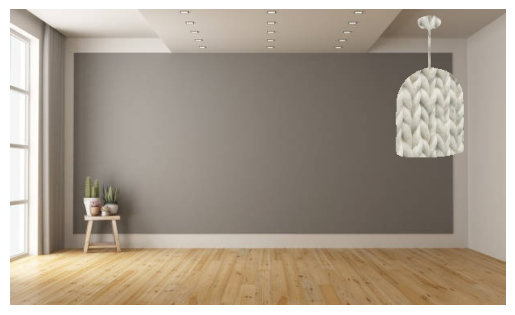

In [87]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def alpha_blend(img_target, img_source, img_mask, offset):
    off_y, off_x = offset
    for y in range(img_mask.shape[0]):
        for x in range(img_mask.shape[1]):
            if img_mask[y, x]:
                alpha = img_mask[y, x] / 255.0
                # Manually blend each channel
                for c in range(3):  # Assuming both images are in BGR format
                    img_target[off_y + y, off_x + x, c] = (
                        img_target[off_y + y, off_x + x, c] * (1 - alpha) +
                        img_source[y, x, c] * alpha
                    )

# Read images and mask
image1 = cv2.imread('/Users/prasadgole/Desktop/Illinois/Computational Photography/Group Project/CS445_Group_Project/Project_Files/room.jpeg')
image2 = cv2.imread('/Users/prasadgole/Desktop/Illinois/Computational Photography/Group Project/CS445_Group_Project/Project_Files/room2.jpg')
texture_image = cv2.imread('/Users/prasadgole/Desktop/Illinois/Computational Photography/Group Project/CS445_Group_Project/Project_Files/texture.png')

# Segment information and mask processing
mask = masks[1]['segmentation']
bbox = masks[1]['bbox']

# Prepare the mask and the source area for blending
cropped_mask = mask[bbox[1]:bbox[1]+bbox[3], bbox[0]:bbox[0]+bbox[2]]
cropped_mask = (cropped_mask > 0).astype('uint8') * 255
cropped_texture = cv2.resize(texture_image, (cropped_mask.shape[1], cropped_mask.shape[0]))

# Perform alpha blending
alpha_blend(image2, cropped_texture, cropped_mask, (bbox[1], bbox[0]))

# Save and display the output
output_filename = '/Users/prasadgole/Desktop/Illinois/Computational Photography/Group Project/CS445_Group_Project/images/outputs/texture_transfer_lamp_blending.jpg'
cv2.imwrite(output_filename, image2)
output_image = Image.open(output_filename)

plt.imshow(output_image)
plt.axis('off')  # Hide axes ticks
plt.show()




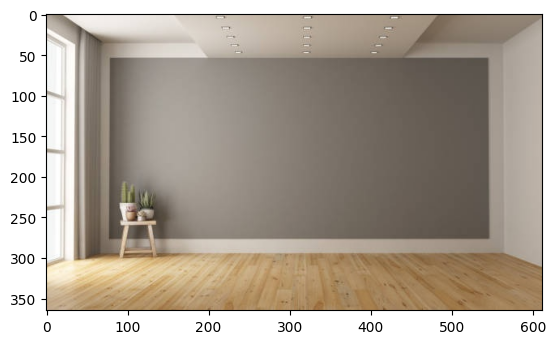

In [92]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def alpha_blend(img_target, img_source, img_mask, offset):
    off_y, off_x = offset
    target_height, target_width = img_target.shape[:2]
    source_height, source_width = img_source.shape[:2]
    mask_height, mask_width = img_mask.shape

    for y in range(mask_height):
        for x in range(mask_width):
            if img_mask[y, x] > 0:
                target_y = off_y + y
                target_x = off_x + x
                if 0 <= target_y < target_height and 0 <= target_x < target_width:
                    alpha = img_mask[y, x] / 255.0
                    img_target[target_y, target_x] = (
                        img_target[target_y, target_x] * (1 - alpha) + img_source[y, x] * alpha
                    ).astype(np.uint8)

# Read images
target_image_path = '/Users/prasadgole/Desktop/Illinois/Computational Photography/Group Project/CS445_Group_Project/Project_Files/room2.jpg'
texture_image_path = '/Users/prasadgole/Desktop/Illinois/Computational Photography/Group Project/CS445_Group_Project/Project_Files/texture.png'

image_target = cv2.imread(target_image_path)
texture_image = cv2.imread(texture_image_path)

# Load couch mask and adjust if necessary
couch_mask = masks_couch10[2]['segmentation']  # Assuming 'masks_couch' is properly defined
bbox = masks_couch10[2]['bbox']

# Resize texture to fit the mask
texture_resized = cv2.resize(texture_image, (couch_mask.shape[1], couch_mask.shape[0]))

# Offset calculation based on the bounding box
offset = (bbox[1], bbox[0])  # y, x

# Perform alpha blending
alpha_blend(image_target, texture_resized, couch_mask, offset)

# Save and display the output
output_filename = '/Users/prasadgole/Desktop/Illinois/Computational Photography/Group Project/CS445_Group_Project/images/outputs/couch_texture_blend.jpg'
cv2.imwrite(output_filename, image_target)
output_image = Image.open(output_filename)

plt.imshow(output_image)

plt.show()


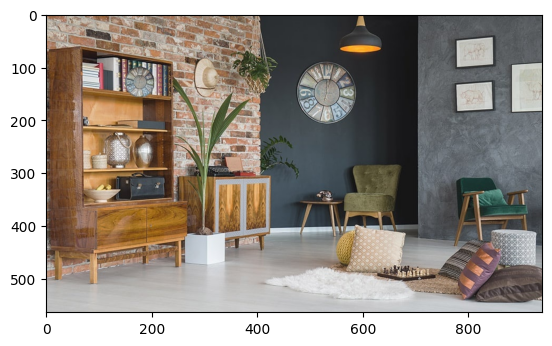

In [95]:
import cv2
import numpy as np
# from google.colab.patches import cv2_imshow

# Load images
image1 = cv2.imread('/Users/prasadgole/Desktop/Illinois/Computational Photography/Group Project/CS445_Group_Project/Project_Files/room4.jpg')  # Load the coffee table image
image2 = cv2.imread('/Users/prasadgole/Desktop/Illinois/Computational Photography/Group Project/CS445_Group_Project/Project_Files/room4.jpg')          # Load the room image

# Assuming maskscouch and bbox information is properly defined somewhere in your script
mask_coffee = maskscouch[1]['segmentation']
bbox_coffee = maskscouch[1]['bbox']

# Process the mask and image for the coffee table
cropped_mask = mask_coffee[bbox_coffee[1]:bbox_coffee[1]+bbox_coffee[3], bbox_coffee[0]:bbox_coffee[0]+bbox_coffee[2]]
cropped_image = image1[bbox_coffee[1]:bbox_coffee[1]+bbox_coffee[3], bbox_coffee[0]:bbox_coffee[0]+bbox_coffee[2]]
cropped_mask = (cropped_mask > 0).astype('uint8') * 255

# Resize the cropped image and mask
scale_factor = 0.5
resized_image = cv2.resize(cropped_image, (int(cropped_image.shape[1] * scale_factor), int(cropped_image.shape[0] * scale_factor)))
resized_mask = cv2.resize(cropped_mask, (int(cropped_mask.shape[1] * scale_factor), int(cropped_mask.shape[0] * scale_factor)))

# Extract the coffee table using the mask
table_extracted = cv2.bitwise_and(resized_image, resized_image, mask=resized_mask)

# Positioning the extracted table in the second image
start_x, start_y = 150, 100
end_x = start_x + table_extracted.shape[1]
end_y = start_y + table_extracted.shape[0]
image2[start_y:end_y, start_x:end_x] = image2[start_y:end_y, start_x:end_x] * (1 - (resized_mask > 0)[:, :, None]) + table_extracted

# Show the final image
# cv2_imshow(image2)

# Save the final image
save_path = '/Users/prasadgole/Desktop/Illinois/Computational Photography/Group Project/CS445_Group_Project/images/outputs/final_composed_image.jpg'
cv2.imwrite(save_path, image2)
output_image = Image.open(save_path)

plt.imshow(output_image)
plt.show()

In [90]:
import cv2
import numpy as np
# from google.colab.patches import cv2_imshow

# Load images
image1 = cv2.imread('/content/drive/My Drive/room4.jpg')  # Load the coffee table image
image2 = cv2.imread('/Users/prasadgole/Desktop/Illinois/Computational Photography/Group Project/CS445_Group_Project/Project_Files/room4.jpg')          # Load the room image

# Assuming maskstable and bounding box information is correctly provided
mask_coffee = maskstable[1]['segmentation']
bbox_coffee = maskstable[1]['bbox']

cropped_mask = mask_coffee[bbox_coffee[1]:bbox_coffee[1]+bbox_coffee[3], bbox_coffee[0]:bbox_coffee[0]+bbox_coffee[2]]
cropped_image = image1[bbox_coffee[1]:bbox_coffee[1]+bbox_coffee[3], bbox_coffee[0]:bbox_coffee[0]+bbox_coffee[2]]

cropped_mask = (cropped_mask > 0).astype('uint8') * 255

scale_factor = 0.5
resized_image = cv2.resize(cropped_image, (int(cropped_image.shape[1] * scale_factor), int(cropped_image.shape[0] * scale_factor)))
resized_mask = cv2.resize(cropped_mask, (int(cropped_mask.shape[1] * scale_factor), int(cropped_mask.shape[0] * scale_factor)))

table_extracted = cv2.bitwise_and(resized_image, resized_image, mask=resized_mask)

start_x, start_y = 515, 140
end_x = start_x + table_extracted.shape[1]
end_y = start_y + table_extracted.shape[0]

image2[start_y:end_y, start_x:end_x] = image2[start_y:end_y, start_x:end_x] * (1 - (resized_mask > 0)[:, :, None]) + table_extracted

# Display the final image
cv2_imshow(image2)

# Save the final image to disk
save_path = '/Users/prasadgole/Desktop/Illinois/Computational Photography/Group Project/CS445_Group_Project/images/outputs'
cv2.imwrite(save_path, image2)
print("Image saved successfully at:", save_path)


ModuleNotFoundError: No module named 'google.colab'

In [64]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load images
image1 = cv2.imread('/content/drive/My Drive/better_sofa.jpg')  # Load the coffee table image
image2 = cv2.imread('/content/drive/My Drive/final_output_image2.jpg')          # Load the room image

mask_coffee = masks_couch10[2]['segmentation']
bbox_coffee = masks_couch10[2]['bbox']

cropped_mask = mask_coffee[bbox_coffee[1]:bbox_coffee[1]+bbox_coffee[3], bbox_coffee[0]:bbox_coffee[0]+bbox_coffee[2]]
cropped_image = image1[bbox_coffee[1]:bbox_coffee[1]+bbox_coffee[3], bbox_coffee[0]:bbox_coffee[0]+bbox_coffee[2]]

cropped_mask = (cropped_mask > 0).astype('uint8') * 255

scale_factor = 0.45
resized_image = cv2.resize(cropped_image, (int(cropped_image.shape[1] * scale_factor), int(cropped_image.shape[0] * scale_factor)))
resized_mask = cv2.resize(cropped_mask, (int(cropped_mask.shape[1] * scale_factor), int(cropped_mask.shape[0] * scale_factor)))

table_extracted = cv2.bitwise_and(resized_image, resized_image, mask=resized_mask)

start_x, start_y = 220, 220
end_x = start_x + table_extracted.shape[1]
end_y = start_y + table_extracted.shape[0]

image2[start_y:end_y, start_x:end_x] = image2[start_y:end_y, start_x:end_x] * (1 - (resized_mask > 0)[:, :, None]) + table_extracted

cv2_imshow(image2)


ModuleNotFoundError: No module named 'google.colab'